In [66]:
import scipy
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt

images = {}
images['original'] = iio.v3.imread('beautiful_girl.jpg')

In [67]:
rgb2gray = lambda rgb: np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
images['grayscale'] = rgb2gray(images['original'])

images['grayscale'].shape

(675, 1200)

In [100]:
def plot_grid(images, cols=5):
    rows = (len(images)+cols-1)//cols
    fig, axes = plt.subplots(rows, cols, figsize=(15,5))

    def axis_off(ax):
        ax.set_axis_off()
        return ax

    raveled_axes = list(map(axis_off, axes.ravel()))

    for index, name in enumerate(images):
        ax = raveled_axes[index]
        image = images[name]
        ax.imshow(image) if len(image.shape) == 3 else ax.imshow(image, cmap='gray')
        ax.set_title(name)

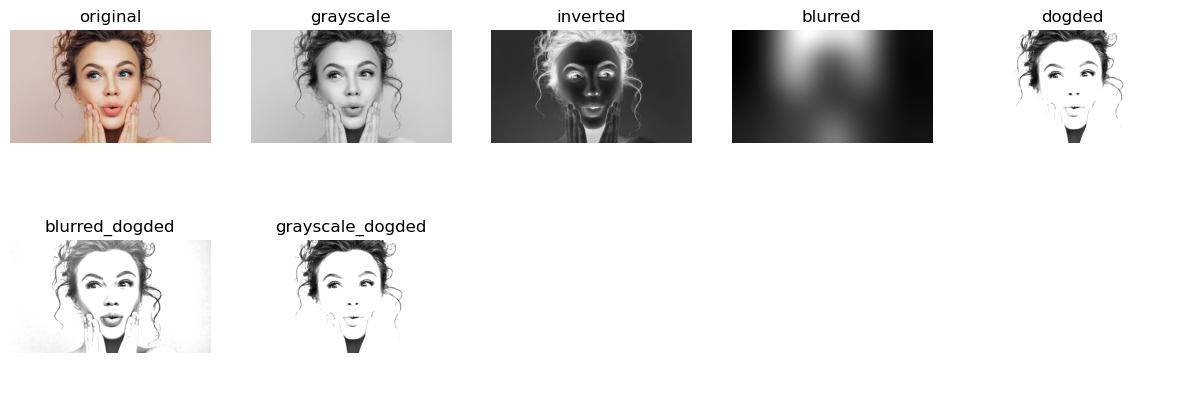

In [123]:
def dodge(front, inverted):
    result=front*255/inverted
    result[result>255]=255
    result[inverted.astype('uint8')==0]=255
    return result.astype('uint8')

images['inverted'] = 255-images['grayscale']
images['blurred'] = scipy.ndimage.gaussian_filter(images['inverted'], sigma=np.median(images['grayscale'])/2)
images['blurred_dogded'] = dodge(images['blurred'], images['inverted'])
images['grayscale_dogded'] = dodge(images['grayscale'], images['inverted'])

plot_grid(images)


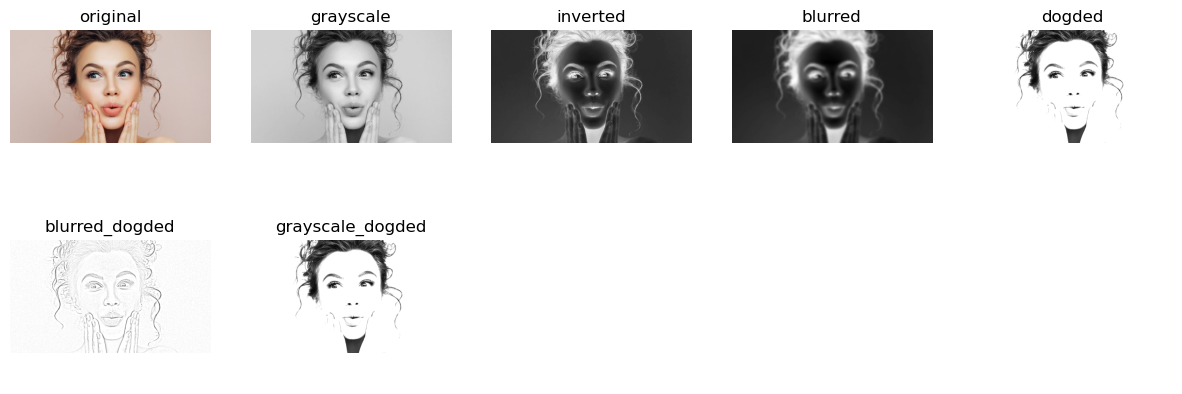